In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from sklearn.decomposition import PCA
from itertools import cycle
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix, accuracy_score

data = pd.read_csv("./data/agaricus-lepiota.data")
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [2]:
for col in data.columns:
    print(f"{col}: {np.unique(data[col])}")

p: ['e' 'p']
x: ['b' 'c' 'f' 'k' 's' 'x']
s: ['f' 'g' 's' 'y']
n: ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
t: ['f' 't']
p.1: ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
f: ['a' 'f']
c: ['c' 'w']
n.1: ['b' 'n']
k: ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
e: ['e' 't']
e.1: ['?' 'b' 'c' 'e' 'r']
s.1: ['f' 'k' 's' 'y']
s.2: ['f' 'k' 's' 'y']
w: ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
w.1: ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
p.2: ['p']
w.2: ['n' 'o' 'w' 'y']
o: ['n' 'o' 't']
p.3: ['e' 'f' 'l' 'n' 'p']
k.1: ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
s.3: ['a' 'c' 'n' 's' 'v' 'y']
u: ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [3]:
ms_col = []
for col in data.columns:
    value_col = np.unique(data[[col]])
    for value in value_col:
        if value == "?":
            ms_col.append(col)
            
ms_col

['e.1']

In [4]:
encode_data = data

decode_ms = {}

for col in ms_col:
    values, counts = np.unique(encode_data[col], return_counts=True)
    decode_ms[col] = {}
    for value, count in zip(values, counts):
        decode_ms[col][value] = count 


In [5]:
# Convert data to numeric value
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in encode_data.columns:
    encode_data[col] = label_encoder.fit_transform(encode_data[col])

for col in encode_data.columns:
    print(f"{col}: {np.unique(encode_data[col])}, type: {encode_data[col].dtype}")
    

p: [0 1], type: int32
x: [0 1 2 3 4 5], type: int32
s: [0 1 2 3], type: int32
n: [0 1 2 3 4 5 6 7 8 9], type: int32
t: [0 1], type: int32
p.1: [0 1 2 3 4 5 6 7 8], type: int32
f: [0 1], type: int32
c: [0 1], type: int32
n.1: [0 1], type: int32
k: [ 0  1  2  3  4  5  6  7  8  9 10 11], type: int32
e: [0 1], type: int32
e.1: [0 1 2 3 4], type: int32
s.1: [0 1 2 3], type: int32
s.2: [0 1 2 3], type: int32
w: [0 1 2 3 4 5 6 7 8], type: int32
w.1: [0 1 2 3 4 5 6 7 8], type: int32
p.2: [0], type: int32
w.2: [0 1 2 3], type: int32
o: [0 1 2], type: int32
p.3: [0 1 2 3 4], type: int32
k.1: [0 1 2 3 4 5 6 7 8], type: int32
s.3: [0 1 2 3 4 5], type: int32
u: [0 1 2 3 4 5 6], type: int32


In [6]:
encode_ms = {}

for col in ms_col:
    values, counts = np.unique(encode_data[col], return_counts=True)
    encode_ms[col] = {}
    for value, count in zip(values, counts):
        encode_ms[col][value] = count 


In [7]:
print(encode_ms)
print(decode_ms)

{'e.1': {0: 2480, 1: 3776, 2: 556, 3: 1119, 4: 192}}
{'e.1': {'?': 2480, 'b': 3776, 'c': 556, 'e': 1119, 'r': 192}}


In [8]:
# Match encode_ms and decode_ms we will see LableEncoder convert missing values to different values
for col in ms_col:
    values = np.unique(encode_data[col])

    avg = int(sum(values)/(len(values))) 
    print(f"{col}: avg = {avg}")
    encode_data[col].replace(0, avg, inplace=True)

ms_col

e.1: avg = 2


C:\Users\thanh\AppData\Local\Temp\ipykernel_29248\3380104461.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encode_data[col].replace(0, avg, inplace=True)


['e.1']

In [9]:
for col in encode_data.columns:
    print(f"{col}: {np.unique(encode_data[col])}, type: {encode_data[col].dtype}")

p: [0 1], type: int32
x: [0 1 2 3 4 5], type: int32
s: [0 1 2 3], type: int32
n: [0 1 2 3 4 5 6 7 8 9], type: int32
t: [0 1], type: int32
p.1: [0 1 2 3 4 5 6 7 8], type: int32
f: [0 1], type: int32
c: [0 1], type: int32
n.1: [0 1], type: int32
k: [ 0  1  2  3  4  5  6  7  8  9 10 11], type: int32
e: [0 1], type: int32
e.1: [1 2 3 4], type: int32
s.1: [0 1 2 3], type: int32
s.2: [0 1 2 3], type: int32
w: [0 1 2 3 4 5 6 7 8], type: int32
w.1: [0 1 2 3 4 5 6 7 8], type: int32
p.2: [0], type: int32
w.2: [0 1 2 3], type: int32
o: [0 1 2], type: int32
p.3: [0 1 2 3 4], type: int32
k.1: [0 1 2 3 4 5 6 7 8], type: int32
s.3: [0 1 2 3 4 5], type: int32
u: [0 1 2 3 4 5 6], type: int32


In [10]:
from sklearn.model_selection import train_test_split

X = encode_data.iloc[:,1:]
y = encode_data.iloc[:,:1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3.0, random_state=42)
print("Length of X train: ", len(X_train))
print("Length of X test: ", len(X_test))
print("Length of y train: ", len(y_train))
print("Length of y test: ", len(y_test))

Length of X train:  5415
Length of X test:  2708
Length of y train:  5415
Length of y test:  2708


In [11]:
svm_model = SVC(kernel="linear").fit(X_train, y_train)

y_predict = svm_model.predict(X_test)
svm_model.score(X_test, y_test)

c:\Users\thanh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9723042836041359

In [12]:
pickle.dump(svm_model, open("SVM_Model.sav", "wb"))

In [13]:
accuracy_score(y_test, y_predict)

0.9723042836041359

In [14]:
confusion_matrix(y_predict, y_test)

array([[1369,   37],
       [  38, 1264]], dtype=int64)

In [15]:
tn, fp, fn, tp = confusion_matrix(y_predict, y_test).ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2*(precision*recall)/(precision+recall)

print(f"Precisioin = {precision}")
print(f"Recall = {recall}")
print(f"F1 = {f1}")

Precisioin = 0.9715603382013835
Recall = 0.9708141321044547
F1 = 0.971187091817134


In [16]:
features = data.drop(columns='p')
target = data['p']
pca_model = PCA(n_components = 2).fit(features)
features_pca = pca_model.transform(features)

pd.DataFrame(data = features_pca)

,0,1
0,-1.756153,4.667739
1,-1.480430,2.316906
2,-0.901481,1.437614
3,1.915062,-1.242022
4,-2.873134,4.534714
...,...,...
8118,-6.609415,-2.161919
8119,-6.683926,-2.101569
8120,-1.968469,0.575685
8121,7.222842,-1.308283


c:\Users\thanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


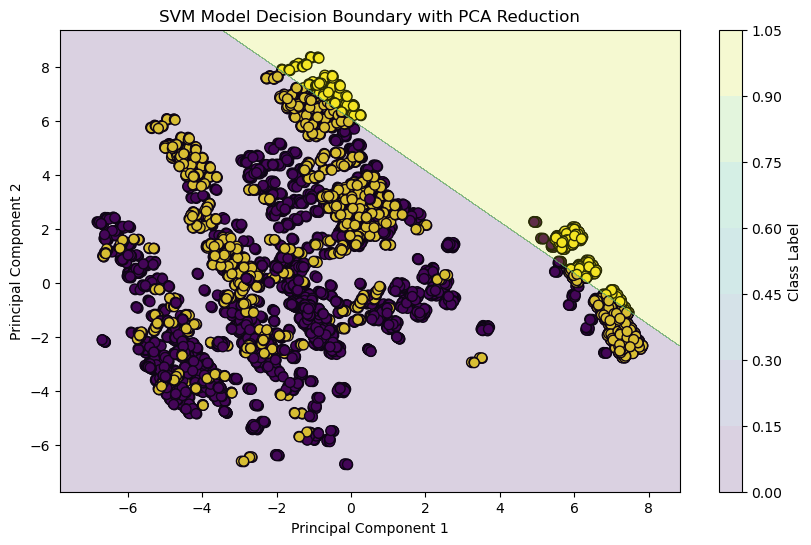

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=target, edgecolor='k', s=50)

# Create a mesh grid for the decision boundary
x_min, x_max = features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1
y_min, y_max = features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = svm_model.predict(pca_model.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2)
plt.title("SVM Model Decision Boundary with PCA Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class Label')
plt.show()